Training Accuracy: 98.56459330143541%
Test Accuracy: 70.0%
Misclassified Indices: [ 5  6 10 13 18 19 28 29 30 33 34 41 44 45 46]


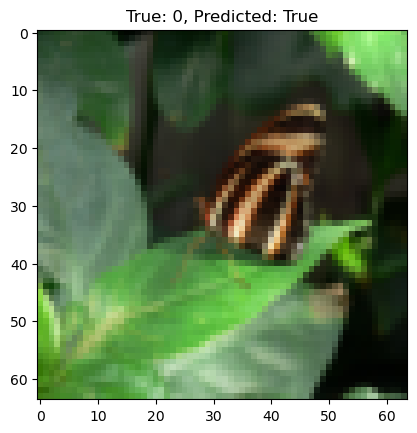

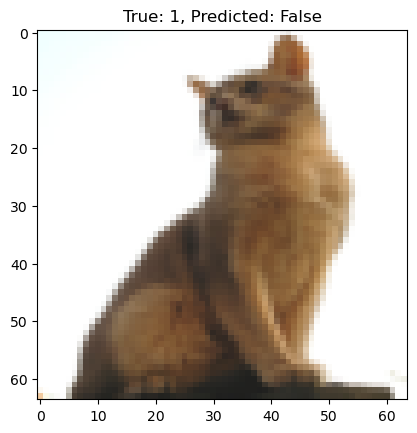

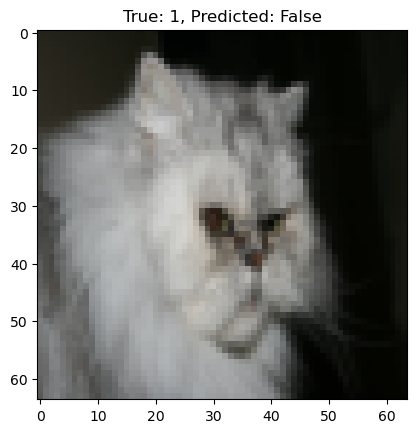

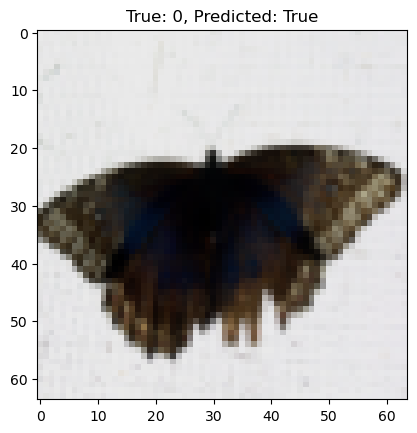

In [1]:
import numpy as np
import h5py
import matplotlib.pyplot as plt #importting what we need 

train_data = h5py.File('train_catvnoncat.h5') #here we are loading our test and train data
test_data = h5py.File('test_catvnoncat.h5')

X_train = np.array(train_data['train_set_x']) #this part takes out the images in the file to be our x train data
Y_train = np.array(train_data['train_set_y']) #this takes out the lables from our data which is our y train data
X_test = np.array(test_data['test_set_x']) #same as above but for our test data 
Y_test = np.array(test_data['test_set_y'])

X_train = X_train.reshape(X_train.shape[0], -1).T / 255.0 #now we are taking the train data, flattening the images which will turn them into vectors, normailizing them to fit from 0 to 1 and taking the transpose
X_test = X_test.reshape(X_test.shape[0], -1).T / 255.0 #doing the same as above but for the test data 
Y_train = Y_train.reshape(1, -1) #this is turning our y values into a row vector that starts from 1 and goes to the number of images
Y_test = Y_test.reshape(1, -1) #same for y test 

def init_parm(dim): #use a funtion here for better use later on
    w = np.zeros((dim, 1)) #this makes a vectors with zeros, so the rows amount of the dim size and 1 column for our starting weights
    b = 0 #starting bias 
    return w, b 

def sigmoid(z):
    return 1 / (1 + np.exp(-z)) #here we make the sigmoid function 

def propagate(w, b, X, Y): #we are now doing forward/backward propagation 
    train_num = X.shape[1] #this gives us the number of training we are using in the column 
    prob = sigmoid(np.dot(w.T, X) + b) #calcualting the probabilities using the sigmoid function with the weights,bias and features 
    cost = -1 / train_num * np.sum(Y * np.log(prob) + (1 - Y) * np.log(1 - prob)) #this is finding our cost using the cost function formula
    dw = 1 / train_num * np.dot(X, (prob - Y).T) #this is the gradient (dw/dx) of the weights 
    db = 1 / train_num * np.sum(prob - Y) #this is the gradient (db/dx) of the bias
    return dw, db, cost

def grad_desc(w, b, X, Y, num_iterations, learning_rate): #now we are doing gradient descent/optimizing our funtion 
    costs = [] #init a cost list to store it 
    for i in range(num_iterations): #starting a for loop for the number of iterations
        dw, db, cost = propagate(w, b, X, Y) #here we want to use the propagate funtion for our dw db and cost
        w -= learning_rate * dw #now we are getting our new weights by subracting whatever our learning rate * dw
        b -= learning_rate * db #same as above but for the bias now, we want to subract becuase we want to minimizes the cost
        costs.append(cost) #appeneding to our empty costs list what we got from propagate function 
    return w, b, costs

def predict(w, b, X): #this is the preditction function we are going to use to find the probability 
    prob = sigmoid(np.dot(w.T, X) + b) #this is the math behind it, using simoid after taking the transpose of w and dot product with x and adding bias 
    return (prob > 0.5) #we are returning if we predicited right or wrong, 0.5 is the common threshold, we are returning a 1 if prob is .5 which means its true

dim = X_train.shape[0] #start to train the model, making our dimesnion the shape of X train in terms of rows or our number of features 
w, b = init_parm(dim) #initilizing our parameters which are w and b and used the funtion made before with the the dimension size 
w, b, costs = grad_desc(w, b, X_train, Y_train, num_iterations=1000, learning_rate=0.01) #here we are using gradient descent to train the model, trail and error to get there iterations and learning rates 

train_predictions = predict(w, b, X_train) #this is testing how good our data set is by making predictions 
test_predictions = predict(w, b, X_test) #doing the same but for the test data 

train_accuracy = 100 - np.mean(np.abs(train_predictions - Y_train)) * 100 #this is calculating our accuracy %
test_accuracy = 100 - np.mean(np.abs(test_predictions - Y_test)) * 100 #for test 

print(f"Training Accuracy: {train_accuracy}%") #printing the accuracy 
print(f"Test Accuracy: {test_accuracy}%")

wrong_indices = np.where(test_predictions != Y_test)[1] #here we are checking where our predicted values did not match our actual values, so 0 instead of 1 or 1 instead of 0
print(f"Misclassified Indices: {wrong_indices}") #printing them out 

for i in range(4): #here we are going to display the first 4 wrong images 
    index = wrong_indices[i] #this gives us the index of a wrong image 
    plt.imshow(X_test[:, index].reshape(64, 64, 3)) #here we reshape the image to what is was originally so we can actually see it and not get an error
                                                    #we are taking the all the rows in that index or that image but since its flattened we have to get the shape back to normal
    plt.title(f"True: {Y_test[0, index]}, Predicted: {test_predictions[0, index]}") #here we are labeling the graphs to see if we are doing false positives or false negatives to see a trend to fix our model
    plt.show() #showing the images 
